In [1]:
import zipfile

In [2]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")

In [3]:
zip_ref.extractall()
zip_ref.close()

In [4]:
#inspect the data
!ls 'pizza_steak'

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import os

#list no of files

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [6]:
#another way to find an image

num_steak_images_train= len(os.listdir("pizza_steak/train/steak"))

In [7]:
num_steak_images_train

750

In [8]:

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [9]:
#visua;ize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
    #setup the target directory
    target_folder = target_dir+target_class
    
    #get random image path
    random_image = random.sample(os.listdir(target_folder),1)
    
    #read and plot image
    #plt.figure(figsize=(10,10))
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"image shape : {img.shape}")
    
    return img


image shape : (384, 512, 3)


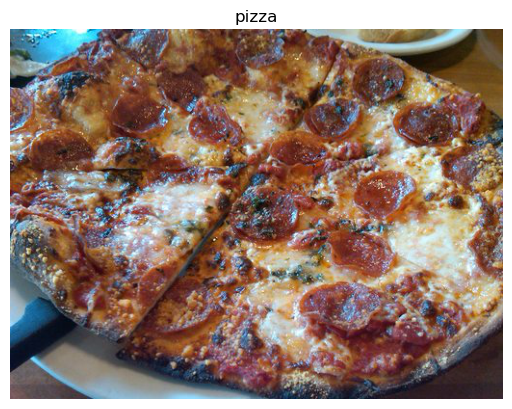

In [10]:
#view a randomimage

img = view_random_image("pizza_steak/train/","pizza")

In [11]:
img

array([[[ 65, 114, 155],
        [ 53, 117, 153],
        [ 48, 124, 158],
        ...,
        [ 85,  56,  22],
        [ 80,  52,  15],
        [ 74,  46,   9]],

       [[ 74, 111, 140],
        [ 63, 114, 141],
        [ 61, 123, 148],
        ...,
        [ 87,  58,  24],
        [ 83,  55,  18],
        [ 79,  51,  14]],

       [[ 74, 106, 129],
        [ 65, 110, 131],
        [ 63, 120, 137],
        ...,
        [ 89,  60,  26],
        [ 88,  60,  23],
        [ 85,  57,  20]],

       ...,

       [[119,  88,  94],
        [118,  87,  93],
        [120,  89,  94],
        ...,
        [ 55,  39,  49],
        [ 56,  40,  51],
        [ 57,  41,  52]],

       [[117,  86,  92],
        [115,  84,  90],
        [117,  86,  92],
        ...,
        [ 56,  40,  51],
        [ 56,  40,  53],
        [ 56,  40,  53]],

       [[117,  86,  92],
        [117,  86,  92],
        [120,  89,  95],
        ...,
        [ 56,  40,  53],
        [ 56,  40,  53],
        [ 56,  40,  53]]

In [12]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 74s 2s/step - loss: 0.5796 - accuracy: 0.6927 - val_loss: 0.4231 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 75s 2s/step - loss: 0.4358 - accuracy: 0.8053 - val_loss: 0.3823 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 67s 1s/step - loss: 0.4216 - accuracy: 0.8160 - val_loss: 0.3513 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 79s 2s/step - loss: 0.3771 - accuracy: 0.8420 - val_loss: 0.3066 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 48s 1s/step - loss: 0.3602 - accuracy: 0.8413 - val_loss: 0.3169 - val_accuracy: 0.8840


In [15]:
#repliacting a primitive model with new data

tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(150,activation="relu"),
    tf.keras.layers.Dense(90,activation="relu"),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_2 = model_2.fit(train_data,epochs=7,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/7
47/47 [==============================] - 21s 428ms/step - loss: 6.6081 - accuracy: 0.6493 - val_loss: 1.7139 - val_accuracy: 0.7540
Epoch 2/7
47/47 [==============================] - 19s 402ms/step - loss: 4.2462 - accuracy: 0.6560 - val_loss: 5.4841 - val_accuracy: 0.6940
Epoch 3/7
47/47 [==============================] - 30s 639ms/step - loss: 2.3839 - accuracy: 0.7400 - val_loss: 1.8205 - val_accuracy: 0.6940
Epoch 4/7
47/47 [==============================] - 30s 622ms/step - loss: 1.5412 - accuracy: 0.7480 - val_loss: 0.7953 - val_accuracy: 0.7780
Epoch 5/7
47/47 [==============================] - 31s 667ms/step - loss: 0.5986 - accuracy: 0.7973 - val_loss: 0.7562 - val_accuracy: 0.7380
Epoch 6/7
47/47 [==============================] - 32s 670ms/step - loss: 0.8068 - accuracy: 0.7867 - val_loss: 1.0435 - val_accuracy: 0.7640
Epoch 7/7
47/47 [==============================] - 31s 648ms/step - loss: 0.7231 - accuracy: 0.7953 - val_loss: 1.3301 - val_accuracy: 0.6840


In [16]:
#repliacting a primitive model with new data

tf.random.set_seed(42)

model_2_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_2_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_2_1 = model_2.fit(train_data,epochs=7,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/7
47/47 [==============================] - 20s 413ms/step - loss: 0.4213 - accuracy: 0.8380 - val_loss: 1.4353 - val_accuracy: 0.6660
Epoch 2/7
47/47 [==============================] - 19s 406ms/step - loss: 0.3533 - accuracy: 0.8700 - val_loss: 0.6565 - val_accuracy: 0.7720
Epoch 3/7
47/47 [==============================] - 20s 417ms/step - loss: 0.2638 - accuracy: 0.8900 - val_loss: 0.7400 - val_accuracy: 0.7360
Epoch 4/7
47/47 [==============================] - 19s 409ms/step - loss: 0.4823 - accuracy: 0.8307 - val_loss: 0.9464 - val_accuracy: 0.7200
Epoch 5/7
47/47 [==============================] - 19s 410ms/step - loss: 0.4375 - accuracy: 0.8560 - val_loss: 0.7922 - val_accuracy: 0.7300
Epoch 6/7
47/47 [==============================] - 19s 406ms/step - loss: 0.6326 - accuracy: 0.8100 - val_loss: 1.9282 - val_accuracy: 0.5960
Epoch 7/7
47/47 [==============================] - 19s 412ms/step - loss: 0.6717 - accuracy: 0.8147 - val_loss: 1.1384 - val_accuracy: 0.6400


In [17]:
#repliacting a primitive model with new data

tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(120,activation="relu"),
    tf.keras.layers.Dense(80,activation="relu"),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_3 = model_2.fit(train_data,epochs=7,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/7
47/47 [==============================] - 19s 409ms/step - loss: 0.4413 - accuracy: 0.8420 - val_loss: 0.7343 - val_accuracy: 0.7500
Epoch 2/7
47/47 [==============================] - 21s 446ms/step - loss: 0.1687 - accuracy: 0.9327 - val_loss: 0.6669 - val_accuracy: 0.7660
Epoch 3/7
47/47 [==============================] - 21s 437ms/step - loss: 0.2875 - accuracy: 0.8900 - val_loss: 0.7131 - val_accuracy: 0.7640
Epoch 4/7
47/47 [==============================] - 31s 663ms/step - loss: 0.2095 - accuracy: 0.9107 - val_loss: 1.1420 - val_accuracy: 0.6780
Epoch 5/7
47/47 [==============================] - 26s 541ms/step - loss: 0.1811 - accuracy: 0.9347 - val_loss: 0.7934 - val_accuracy: 0.7260
Epoch 6/7
47/47 [==============================] - 20s 421ms/step - loss: 0.0980 - accuracy: 0.9713 - val_loss: 0.6582 - val_accuracy: 0.7720
Epoch 7/7
47/47 [==============================] - 28s 609ms/step - loss: 0.0914 - accuracy: 0.9693 - val_loss: 0.6683 - val_accuracy: 0.7580


In [18]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_14 (Dense)            (None, 200)               30105800  
                                                                 
 dense_15 (Dense)            (None, 120)               24120     
                                                                 
 dense_16 (Dense)            (None, 80)                9680      
                                                                 
 dense_17 (Dense)            (None, 1)                 81        
                                                                 
Total params: 30139681 (114.97 MB)
Trainable params: 30139681 (114.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

image shape : (512, 512, 3)
image shape : (384, 512, 3)


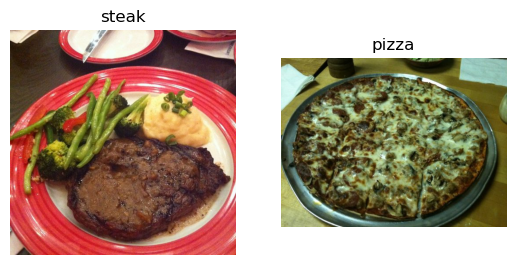

In [20]:
#1. visualize the data
plt.figure()
plt.subplot(1,2,1)
steam_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

In [21]:
#define directory datasets
train_dir = "pizza_steak/train/"
test_dir = 'pizza_steak/test/'

In [22]:
#create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [23]:
train_data = train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode="binary",batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),class_mode="binary",batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
images,labels = train_data.next()
len(images),len(labels)

(32, 32)

In [25]:
len(train_data)

47

In [26]:
images[:2],images[0].shape

(array([[[[0.32156864, 0.3529412 , 0.16862746],
          [0.32941177, 0.3529412 , 0.17254902],
          [0.30980393, 0.33333334, 0.15294118],
          ...,
          [0.7254902 , 0.59607846, 0.4666667 ],
          [0.7137255 , 0.5803922 , 0.4431373 ],
          [0.70980394, 0.5686275 , 0.43529415]],
 
         [[0.32156864, 0.34509805, 0.16470589],
          [0.3254902 , 0.34901962, 0.16862746],
          [0.30980393, 0.33333334, 0.15294118],
          ...,
          [0.6       , 0.47058827, 0.34117648],
          [0.62352943, 0.49411768, 0.3647059 ],
          [0.65882355, 0.52156866, 0.39607847]],
 
         [[0.3372549 , 0.36078432, 0.18039216],
          [0.3372549 , 0.36078432, 0.18039216],
          [0.32941177, 0.3529412 , 0.17254902],
          ...,
          [0.3372549 , 0.21960786, 0.10980393],
          [0.32941177, 0.21176472, 0.10196079],
          [0.34509805, 0.227451  , 0.11764707]],
 
         ...,
 
         [[0.47058827, 0.41176474, 0.19607845],
          [0.47843

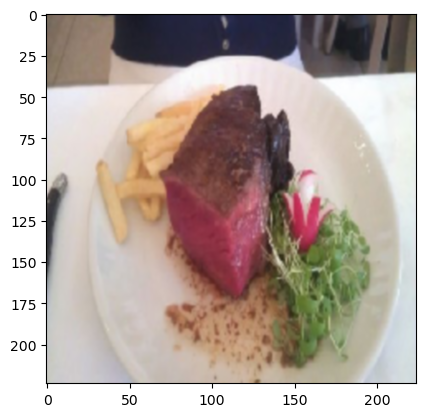

In [27]:
plt.imshow(images[1],interpolation="bicubic")

In [28]:
labels

array([0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.],
      dtype=float32)

In [29]:
# create a CNN model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
model_4 = Sequential([
    Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])




In [31]:
model_4.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["Accuracy"])

In [32]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_6 (Flatten)         (None, 475240)            0         
                                                                 
 dense_18 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
history_4 = model_4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data = test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 75s 2s/step - loss: 0.7100 - Accuracy: 0.6947 - val_loss: 0.4250 - val_Accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 76s 2s/step - loss: 0.4072 - Accuracy: 0.8253 - val_loss: 0.4175 - val_Accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 78s 2s/step - loss: 0.2969 - Accuracy: 0.8787 - val_loss: 0.3573 - val_Accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 79s 2s/step - loss: 0.1708 - Accuracy: 0.9467 - val_loss: 0.3638 - val_Accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 66s 1s/step - loss: 0.0634 - Accuracy: 0.9833 - val_loss: 0.4181 - val_Accuracy: 0.8240


In [34]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_6 (Flatten)         (None, 475240)            0         
                                                                 
 dense_18 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
#evaluating out model
model_4.evaluate(test_data)

16/16 [==============================] - 3s 180ms/step - loss: 0.4181 - Accuracy: 0.8240


[0.4181230068206787, 0.8240000009536743]

<Axes: >

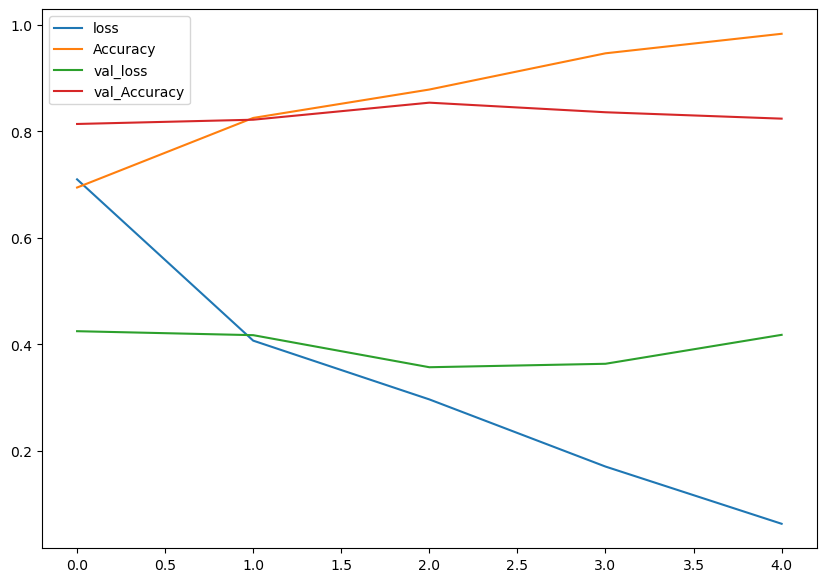

In [36]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [37]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["Accuracy"]
    val_accuracy = history.history["val_Accuracy"]
    epochs=range(len(history.history["loss"]))
    
    plt.plot(epochs,loss,label="Training loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.figure()
    plt.plot(epochs,accuracy,label="training accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

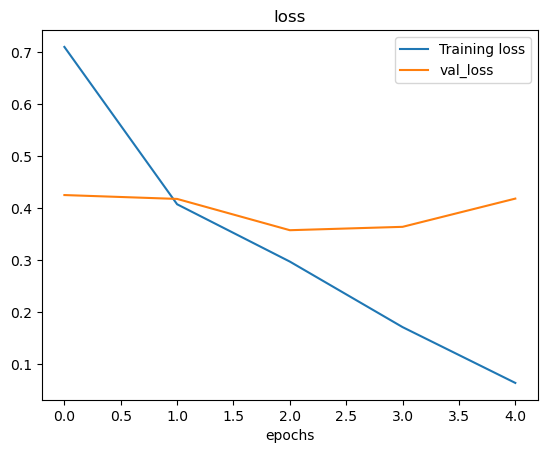

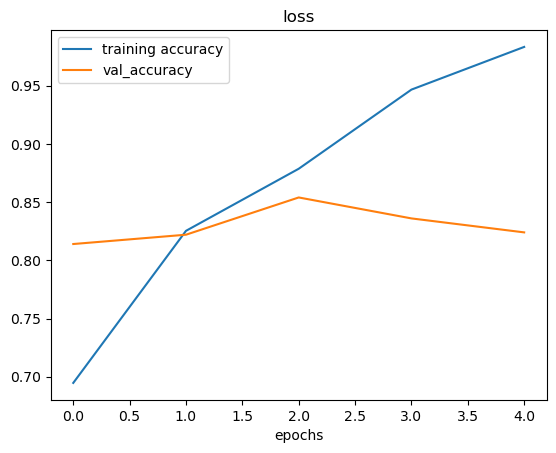

In [38]:
plot_loss_curves(history_4)

In [39]:
#create a new baseline model
model_5 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [40]:
model_5.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["Accuracy"])

In [41]:
history_5=model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 20s 409ms/step - loss: 0.6616 - Accuracy: 0.6267 - val_loss: 0.5902 - val_Accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 22s 476ms/step - loss: 0.5172 - Accuracy: 0.7593 - val_loss: 0.4312 - val_Accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 23s 486ms/step - loss: 0.4739 - Accuracy: 0.7913 - val_loss: 0.3938 - val_Accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 23s 493ms/step - loss: 0.4354 - Accuracy: 0.8120 - val_loss: 0.3833 - val_Accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 21s 453ms/step - loss: 0.4283 - Accuracy: 0.8113 - val_loss: 0.3779 - val_Accuracy: 0.8260


In [42]:
model_5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 55, 55, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 53, 53, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)        0         
 g2D)                                                            
                                                      

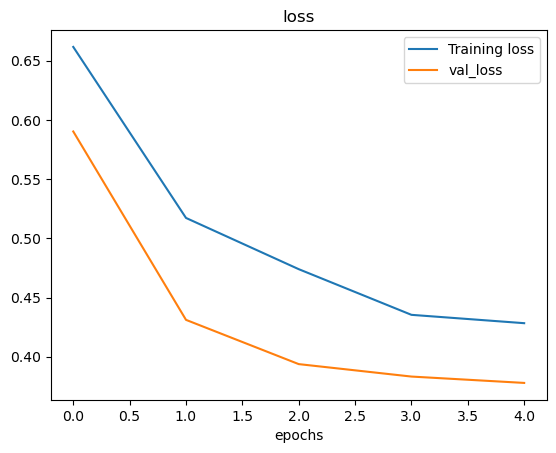

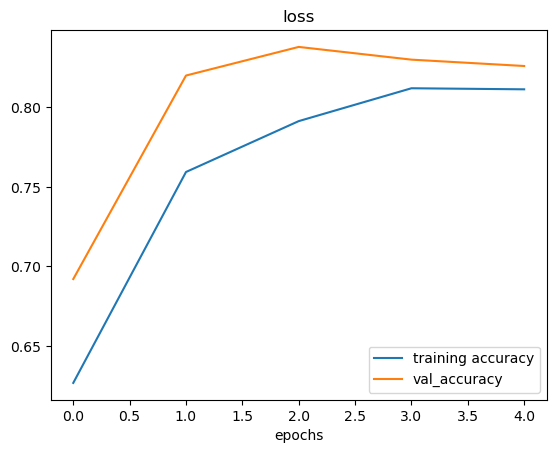

In [43]:
plot_loss_curves(history_5)

In [44]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,rotation_range=0.2,shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.3,horizontal_flip=True)

In [45]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [46]:
print("Aud=gmented training data")
train_data_augmented =train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="binary",shuffle=False)

#create non augmented
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="binary",shuffle=False)
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode="binary",shuffle=False)

Aud=gmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [47]:
import random
random_number = random.randint(0,32)
images,labels = train_data.next()
augmented_images,augmented_labels = train_data_augmented.next()

21


Text(0.5, 1.0, 'Augmented Image')

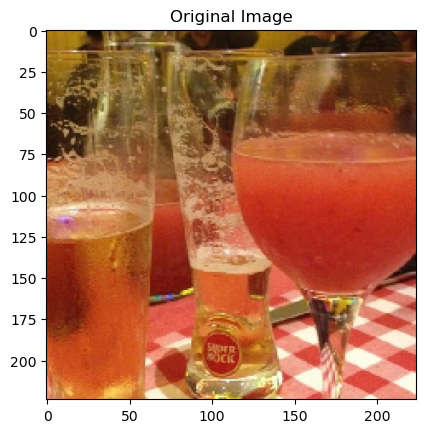

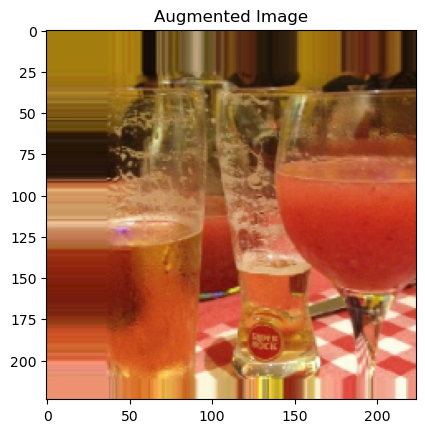

In [48]:
print(random_number)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")

In [49]:
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["Accuracy"])

history_6=model_6.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 34s 705ms/step - loss: 0.7614 - Accuracy: 0.5727 - val_loss: 0.6875 - val_Accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 37s 786ms/step - loss: 0.6963 - Accuracy: 0.5007 - val_loss: 0.6715 - val_Accuracy: 0.5220
Epoch 3/5
47/47 [==============================] - 31s 649ms/step - loss: 0.6860 - Accuracy: 0.5247 - val_loss: 0.6432 - val_Accuracy: 0.7140
Epoch 4/5
47/47 [==============================] - 35s 738ms/step - loss: 0.6704 - Accuracy: 0.6247 - val_loss: 0.6145 - val_Accuracy: 0.7060
Epoch 5/5
47/47 [==============================] - 31s 664ms/step - loss: 0.6695 - Accuracy: 0.5900 - val_loss: 0.5466 - val_Accuracy: 0.7880


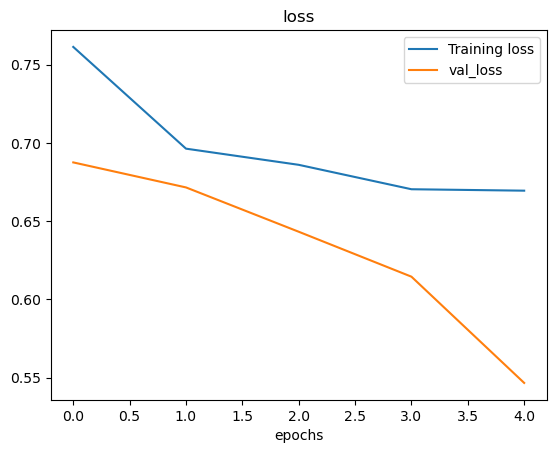

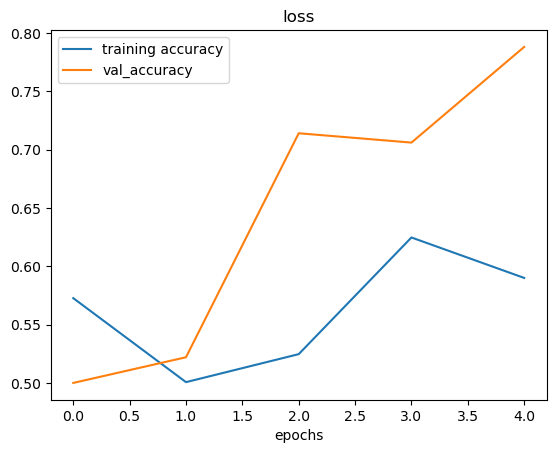

In [50]:
plot_loss_curves(history_6)

In [51]:
print("Aud=gmented training data")
train_data_augmented =train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="binary",shuffle=True)

#create non augmented
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="binary",shuffle=True)
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode="binary",shuffle=True)

Aud=gmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [52]:
model_7 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["Accuracy"])

history_7=model_7.fit(train_data_augmented,epochs=7,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/7
47/47 [==============================] - 34s 698ms/step - loss: 0.6591 - Accuracy: 0.6160 - val_loss: 0.5759 - val_Accuracy: 0.6900
Epoch 2/7
47/47 [==============================] - 32s 680ms/step - loss: 0.6000 - Accuracy: 0.6747 - val_loss: 0.4578 - val_Accuracy: 0.8060
Epoch 3/7
47/47 [==============================] - 33s 704ms/step - loss: 0.5462 - Accuracy: 0.7273 - val_loss: 0.3982 - val_Accuracy: 0.8360
Epoch 4/7
47/47 [==============================] - 33s 692ms/step - loss: 0.5116 - Accuracy: 0.7507 - val_loss: 0.3798 - val_Accuracy: 0.8360
Epoch 5/7
47/47 [==============================] - 33s 694ms/step - loss: 0.5030 - Accuracy: 0.7560 - val_loss: 0.3594 - val_Accuracy: 0.8540
Epoch 6/7
47/47 [==============================] - 25s 516ms/step - loss: 0.4637 - Accuracy: 0.7880 - val_loss: 0.3385 - val_Accuracy: 0.8400
Epoch 7/7
47/47 [==============================] - 27s 581ms/step - loss: 0.4862 - Accuracy: 0.7747 - val_loss: 0.4145 - val_Accuracy: 0.8040


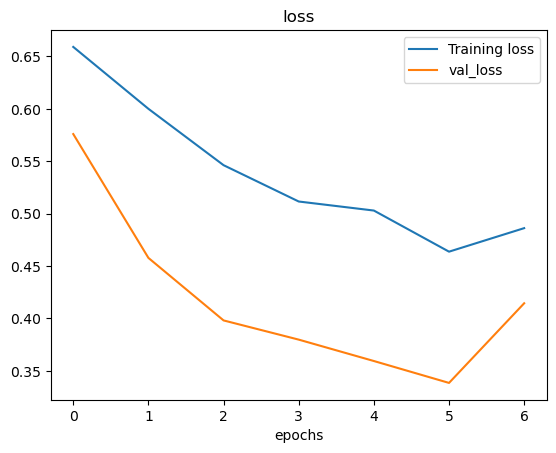

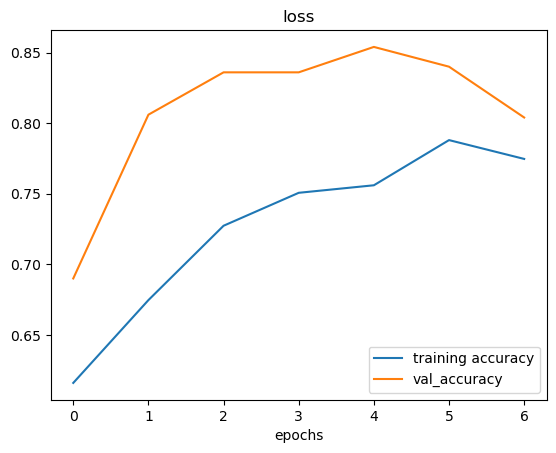

In [53]:
plot_loss_curves(history_7)

In [54]:
steak = mpimg.imread("03-steak.jpeg")

(-0.5, 3023.5, 4031.5, -0.5)

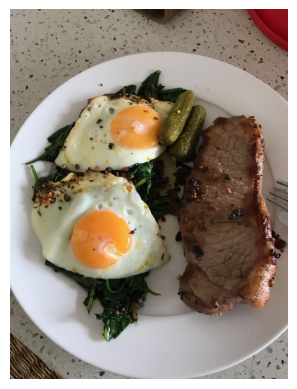

In [55]:
plt.imshow(steak)
plt.axis(False)

In [56]:
expanded_steak = tf.expand_dims(steak,axis=0)

In [57]:
#create a function to resize an image
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    
    img=tf.image.decode_image(img)
    
    img=tf.image.resize(img,size=[img_shape,img_shape])
    
    img=img/255.
    return img

In [58]:
steak=load_and_prep_image("03-steak.jpeg")
pred=model_7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 243ms/step


In [59]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [60]:
pred_class =class_names[int(tf.round(pred))]

In [61]:
pred_class

'steak'

In [64]:
def pred_and_plot(model,filename,class_names=class_names):
    img = load_and_prep_image(filename)
    
    pred = model.predict(tf.expand_dims(img,axis=0))
    
    pred_class = class_names[int(tf.round(pred))]
    
    plt.imshow(img)
    plt.title(f"Prediction : {pred_class}\n accuracy : {pred}")
    plt.axis(False)
    
    

1/1 [==============================] - 0s 23ms/step


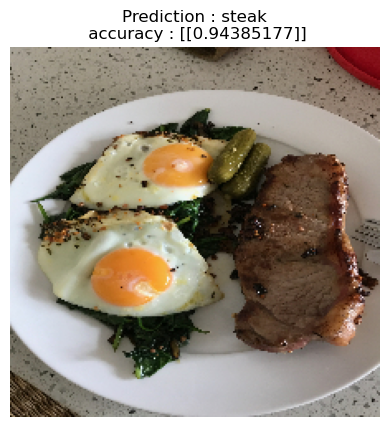

In [65]:
pred_and_plot(model_1,"03-steak.jpeg")

1/1 [==============================] - 0s 23ms/step


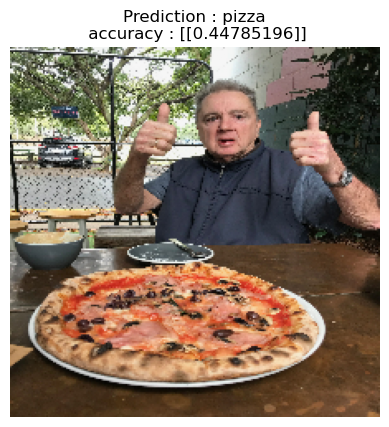

In [66]:
pred_and_plot(model_1,"03-pizza-dad.jpeg")

1/1 [==============================] - 0s 19ms/step


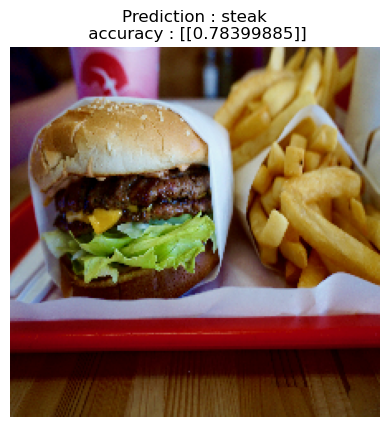

In [67]:
pred_and_plot(model_7,"03-hamburger.jpeg")

1/1 [==============================] - 0s 21ms/step


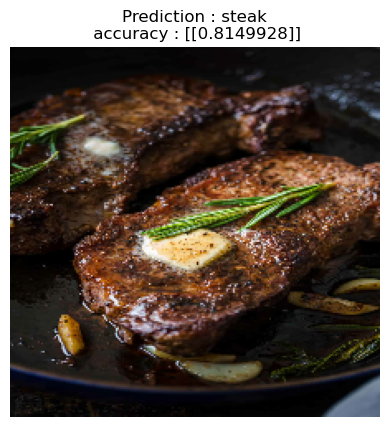

In [68]:
pred_and_plot(model_1,"Pan-Seared-Steak-4.jpg")